In [616]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, log_loss, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set(rc={'figure.figsize': (9, 6)})

In [611]:
class SGDClassifier(BaseEstimator):

    def __init__(self, eta=10**-3, max_iter=10, alpha=10*-4, quiet=False):
        self.loss_ = []
        self.weights_ = []
        self.params = {}
        self.params['eta'] = eta
        self.params['max_iter'] = max_iter
        self.params['alpha'] = alpha
        self.params['quiet'] = quiet
        super(SGDClassifier, self).set_params(**self.params)
    
    def sigma(self, z):
        if z > 100:
            z = 100
        elif z < -100:
            z = -100
        return 1. / (1 + np.exp(-z))

    def fit(self, X, y):
        X = np.hstack([np.array([1] * len(y)).reshape(-1,1), X])
        self.w = [0] * (len(X[0]) + 1)
        #self.w = np.random.randn(len(X[0]) + 1)

        for epoch in range(self.params['max_iter']):
            eta = self.params['eta']
            #eta = self.params['eta'] / (epoch + 1)
            for i in range(len(y)):
                y_pred = self.predict_p([X[i]])[0][0]

                for j in range(len(X[i])):
                    l2 = self.w[j] * self.params['alpha']
                    
                    gradient = (y_pred - y[i]) * X[i][j] * y_pred * (1 - y_pred)
                    #gradient = X[i][j] * (y_pred - y[i])
                    
                    self.w[j] = self.w[j] - eta * (gradient + l2)

            loss = log_loss(y, self.predict_p(X))
            if len(self.loss_) > 0 and abs(loss - self.loss_[-1]) < 10**-6:
                break
            self.loss_.append(loss)
            self.weights_.append(self.w.copy())

            if not self.params['quiet']:
                print(f'>epoch={epoch}, log_loss={loss:.6f}')

        return self

    def predict_yx(self, X):
        pred = 0
        for i in range(len(X)):
            pred += self.w[i]*X[i]
        return pred
    
    def predict_p(self, X):
        y_pred = []
        for i in range(len(X)):
            pred = self.predict_yx(X[i])
            c1 = self.sigma(pred)
            c0 = 1 - c1
            y_pred.append([c0, c1])
        return y_pred

    def predict_proba(self, X):
        X = np.hstack([np.array([1] * len(X)).reshape(-1,1), X])
        return self.predict_p(X)

    def predict(self, X):
        return [1 if i[0] < 0.5 else -1 for i in self.predict_proba(X)]

In [557]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# поменяем метки в y с 0 на -1
X, y = cancer.data, [-1 if i == 0 else 1 for i in cancer.target]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [585]:
sgd_clf = SGDClassifier(alpha=10**-4, eta=10**-3, max_iter=10, quiet=False)
sgd_clf.fit(X_train_scaled, y_train)

>epoch=0, log_loss=0.418617
>epoch=1, log_loss=0.314495
>epoch=2, log_loss=0.266595
>epoch=3, log_loss=0.239013
>epoch=4, log_loss=0.220773
>epoch=5, log_loss=0.207581
>epoch=6, log_loss=0.197433
>epoch=7, log_loss=0.189272
>epoch=8, log_loss=0.182489
>epoch=9, log_loss=0.176708


SGDClassifier(alpha=0.0001, eta=0.001, max_iter=10, quiet=False)

In [586]:
print(f'train_score: {accuracy_score(y_train, sgd_clf.predict(X_train_scaled)), log_loss(y_train, sgd_clf.predict_proba(X_train_scaled))}')
print(f'valid_score: {accuracy_score(y_valid, sgd_clf.predict(X_valid_scaled)), log_loss(y_valid, sgd_clf.predict_proba(X_valid_scaled))}')

train_score: (0.9472361809045227, 0.17670754555636584)
valid_score: (0.9239766081871345, 0.2074963499114722)


In [612]:
sgd_clf = SGDClassifier(alpha=10**-6, eta=10**-1, max_iter=1000, quiet=False)
sgd_clf.fit(X_train_scaled, y_train)

>epoch=0, log_loss=0.087949
>epoch=1, log_loss=0.072396
>epoch=2, log_loss=0.063732
>epoch=3, log_loss=0.059029
>epoch=4, log_loss=0.056354
>epoch=5, log_loss=0.054437
>epoch=6, log_loss=0.052877
>epoch=7, log_loss=0.051501
>epoch=8, log_loss=0.050230
>epoch=9, log_loss=0.049062
>epoch=10, log_loss=0.048121
>epoch=11, log_loss=0.047619
>epoch=12, log_loss=0.047424
>epoch=13, log_loss=0.047174
>epoch=14, log_loss=0.046852
>epoch=15, log_loss=0.046523
>epoch=16, log_loss=0.046212
>epoch=17, log_loss=0.045929
>epoch=18, log_loss=0.045676
>epoch=19, log_loss=0.045453
>epoch=20, log_loss=0.045256
>epoch=21, log_loss=0.045084
>epoch=22, log_loss=0.044933
>epoch=23, log_loss=0.044801
>epoch=24, log_loss=0.044686
>epoch=25, log_loss=0.044586
>epoch=26, log_loss=0.044498
>epoch=27, log_loss=0.044420
>epoch=28, log_loss=0.044352
>epoch=29, log_loss=0.044292
>epoch=30, log_loss=0.044238
>epoch=31, log_loss=0.044189
>epoch=32, log_loss=0.044145
>epoch=33, log_loss=0.044104
>epoch=34, log_loss=0.04

SGDClassifier(alpha=1e-06, eta=0.1, max_iter=1000, quiet=False)

In [613]:
print(f'train_score: {accuracy_score(y_train, sgd_clf.predict(X_train_scaled)), log_loss(y_train, sgd_clf.predict_proba(X_train_scaled))}')
print(f'valid_score: {accuracy_score(y_valid, sgd_clf.predict(X_valid_scaled)), log_loss(y_valid, sgd_clf.predict_proba(X_valid_scaled))}')

train_score: (0.992462311557789, 0.032319028652426196)
valid_score: (0.9707602339181286, 0.25032853142569844)


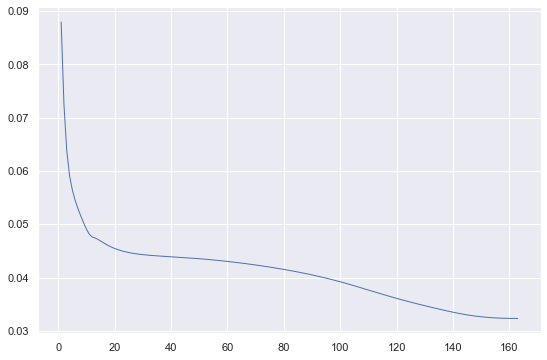

In [617]:
plt.plot(range(1, len(sgd_clf.loss_)+1), sgd_clf.loss_, linewidth=1);